In [45]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from database import creating_engine, creating_session, closing_session, disposing_engine


### Exploration Proccess

In [46]:
df=pd.read_csv('Data\salesforcourse-4fe2kehu.csv',  na_values=[''])
df.head(2)

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.0,109.0,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.5,28.5,49.0,57.0,NaN


#### How many variables of each data type do we have in the dataset?

In [47]:
(
    df
    .dtypes
    .value_counts()
)

float64    8
object     7
int64      1
Name: count, dtype: int64

#### What are the dimesions of the dataset?

In [48]:
df.shape

(34867, 16)

#### Are there explicit null values in the dataset?

In [49]:
df.isnull().any()

index               False
Date                 True
Year                 True
Month                True
Customer Age         True
Customer Gender      True
Country              True
State                True
Product Category     True
Sub Category         True
Quantity             True
Unit Cost            True
Unit Price           True
Cost                 True
Revenue             False
Column1              True
dtype: bool

#### How many do we have for each variable?

In [50]:
(
    df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

Column1             32293
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
index                   0
Revenue                 0
dtype: int64

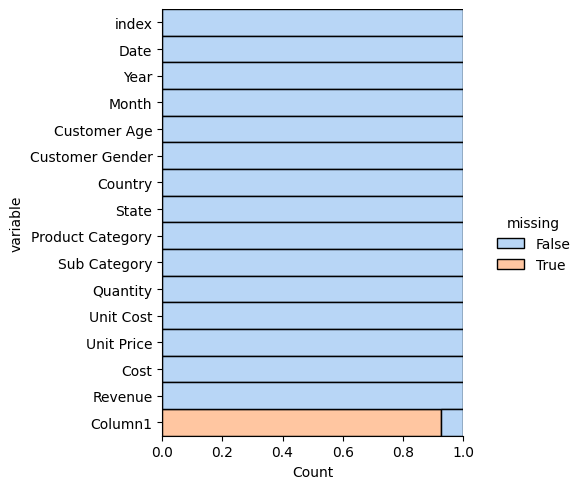

In [52]:
(
    df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=1
            )
        )
    )
)

As we can see in the last cell, Column1 is almost empty, and probably there's a row that only contains "index" and "Revenue" which is not useful

#### Now, let's take a look at the proportion of data for each country

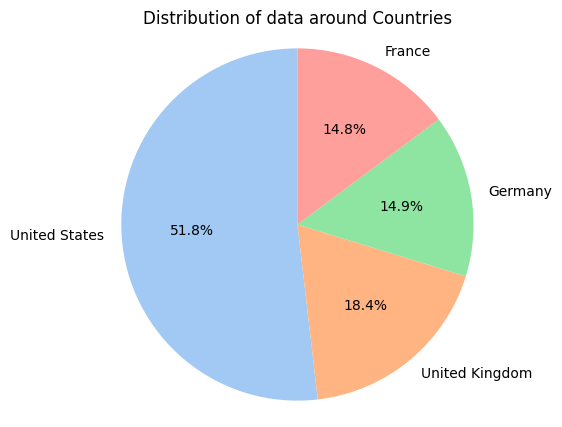

In [51]:
frequency = df['Country'].value_counts()
plt.figure(figsize=(5,5))
sns.set_palette("pastel")
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of data around Countries')
plt.show()
           

#### Is there any duplicated value?

In [53]:
duplicate_values = df[df.duplicated()].count().sum()
print("The number of duplicates is:", duplicate_values)

The number of duplicates is: 0


### Transform

Let's start by deleting "Column1"

In [54]:
df.drop('Column1', axis=1, inplace=True)

Now, I'm going to proceed to drop columns "Year" and "Month" as we already have a "Date" column

In [55]:
df.drop(['Year', 'Month'], axis=1, inplace=True)

Let's drop the null values

In [56]:
df.dropna(inplace=True)

Now let's set the columns "Quantity" and "Customer Age" as int

In [57]:
df['Quantity'] = df['Quantity'].astype(int)
df['Customer Age'] = df['Customer Age'].astype(int)


### Load

Connect to Postgres

In [58]:
# Create the engine and the session
engine = creating_engine()
session = creating_session(engine)

Send data to PostgreSQL

In [59]:
# Load data into the database.
table = "Sales"
df.to_sql(table, engine, if_exists="replace", index=False)

# Closing the session
closing_session(session)
disposing_engine(engine)

engine closed


In [ ]:
#TODO:Crear Gitignore
#TODO:Crear Readme